# IDC CANLab tool

This notebook is designed for the eye tracking lab - School of Psychology, the Interdisciplinary Center (IDC) Herzliya. The goal of this tool, is to ease the data cleaning process while for a psychology research.


This notebook is build from the following sections:
1.   Prerequisite
2.   List item



If this is your first time using google colab, we highly recommend going over this short tutorial ([link](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0)) and video ([link](https://www.youtube.com/watch?v=inN8seMm7UI)).

## Section 1 - Prerequisite
This section is **mandatory**, and should be excuted before each use of the notebook. This section includes importing used packages, environment setup and connecting to the IDC_CANLab repository. 
This section has 4 subsection: 1.1 - 1.4.

**Note:** This is a **mandatory** section, which you should run in the beginning of every session.

In [ ]:
# subsection 1.1 (GitHub)
!git clone https://github.com/danibachar/idc_CANLab.git

## This is a crucial step, please paste here the passphere you have recieved and run the box

In [ ]:
!echo `Please Replace all of this with the passphere` | gpg --batch --yes --passphrase-fd 0 idc_CANLab/notebooks/data.json.gpg
!cp idc_CANLab/notebooks/data.json .

In [ ]:
# subsection 1.2 (IDC_CANLab repository)
!pip3 install -r idc_CANLab/requirements.txt

In [ ]:
# subsection 1.3 (imports)
from google.colab import drive
from google.colab import files
    
from idc_CANLab.functions import utils,plots,consts, summary, backup # Our functionalities

from ipywidgets import interact, interactive, fixed, interact_manual#, FileUpload
import ipywidgets as widgets
from IPython.display import display
from IPython.display import FileLink, FileLinks
# Data manipulation and calculation packages
import pandas as pd
import numpy as np
import os, io

In [ ]:
# subsection 1.4 (data sturctures)
dfs = {}
data_frame_names = []
cleaning_dfs = {}
cleaning_file_names = []

---

---

## Section 2 - Research Environment
This section is **mandatory**, and should be excuted after section 1 and before all other sections of the notebook. This section includes building the research environment.

Special instructions:
- run subsection 2.1.
- fill both text box after subsection 2.1. is done running
- run subsection 2.2.

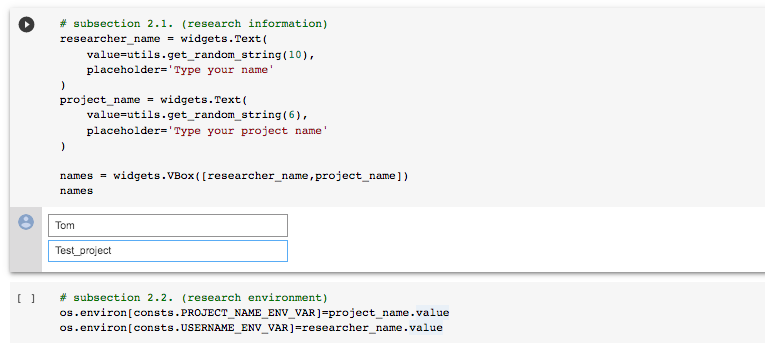

This section has 2 subsection: 2.1. - 2.2.

**Note:** This is a **mandatory** section.

**Note:** Make sure to run subsection 2.2. after you fill the information in subsection 2.1.

In [ ]:
# subsection 2.1. (research information)
researcher_name = widgets.Text(
    value=utils.get_random_string(10),
    placeholder='Type your name'
)
project_name = widgets.Text(
    value=utils.get_random_string(6),
    placeholder='Type your project name'
)

names = widgets.VBox([researcher_name,project_name])
names

In [ ]:
# subsection 2.2. (research environment)
os.environ[consts.PROJECT_NAME_ENV_VAR]=project_name.value
os.environ[consts.USERNAME_ENV_VAR]=researcher_name.value

---

---

## Section 3 - Primary Files
In this section we will open the primary research file(s). **Please note**, the system is a session based system, that is, it saves the data for a undefined time after you finish the session. Thus, we recommend, if you upolad your data in the past, **go over subsection 3.1.1 - 3.1.2.** and check if your data is saved, if so, all you need to do, is to load the data to the notebook. **Otherwise, jump to subsections 3.2.1.-3.2.2.** and upload the data to the system.


**Comments:**
1. You can choose here more than one file, but the files must have the same structure (What we will do is taking all the files and concat them together.)
2. Please note we currently support only CSV files
3. If your'e using Excel or other file formats please convert to CSV
    - Excel to CSV ([link](https://knowledgebase.constantcontact.com/articles/KnowledgeBase/6409-saving-an-excel-file-as-a-csv-file?lang=en_US))
    - EDF to CSV ([link](https://emotiv.gitbook.io/emotivpro/convert_edf_to_csv))
4. For the primary data frame, in subsection 3.1. and 3.3. , you can choose more than one file, this is done in case when you want to concat a number of files. **Please note**  in this case, files must have the same structure or else it will fail.

---

### Section 3.1 - Uploaded Primary Files

---

In [ ]:
# subsection 3.1. (pick primary past uploaded file)
def choose_filename(filename):
  return filename
primary_file_name_dropdown = widgets.SelectMultiple(
    options=utils.list_all_files_in_dir("."),
    description='File name:',
    layout={'width': 'max-content'}
)
# primary_file_name_dropdown
interact(choose_filename, filename=primary_file_name_dropdown)

In [ ]:
# subsection 3.2. (load primary past uploaded file)
primary_file_names = list(primary_file_name_dropdown.value)
un_concat_dfs = []
for file_name in primary_file_names:
  un_concat_dfs.append(pd.read_csv(file_name))

dfs['primary'] = pd.concat(un_concat_dfs)
data_frame_names = list(dfs.keys())

print(summary.info_dfs(list(dfs.values())))
for sum_url in summary.describe_dfs(list(dfs.values())):
    print(sum_url)


---

### Section 3.2 - Upload New Primary Files

---

In [ ]:
# subsection 3.2.1. (pick primary file to upload)
uploaded = files.upload()

In [ ]:
# subsection 3.2.2. (upload primary file)
un_concat_dfs = []
for file_name, byte_file in uploaded.items():
    un_concat_dfs.append(pd.read_csv(io.StringIO(byte_file.decode("utf-8"))))
dfs['primary'] = pd.concat(un_concat_dfs)
data_frame_names = list(dfs.keys())

print(summary.info_dfs(list(dfs.values())))
for sum_url in summary.describe_dfs(list(dfs.values())):
    print(sum_url)

---

---

## Section 4 - Other Files (to be merged with primary)

In this section we will upload files to be merged with the primary research files (from section 3) and merge them. In the end of this section, you will have one merged file. [For example, one can marge betwen raw data and memory span, age, etc].

An INNER JOIN (**merge**) is such type of join that returns all rows from both the participating tables (flies) where the key record of one table (primary) is equal to the key records of another table (other file). This type of join required a comparison operator to match rows from the participating tables based on a common field or column of both the tables. This operation is **not mandatory** and is done in subsections 4.5.-4.6.

![image](https://i.stack.imgur.com/cQZCg.png)

**Please note**, the system is a session based system, that is, it saves the data for a undefined time after you finish the session. Thus, we recommend, if you upolad your data in the past, **go over subsection 4.1.1. - 4.1.2.** and check if your data is saved, if so, all you need to do, is to load the data to the notebook. **Otherwise, jump to subsections 4.2.1.-4.2.2.** and upload the data to the system. **Following, go over to section 4.3.1-4.3.2 to merge the choosen files with the primary**


Comments:
1. Please note we currently support only CSV files
2. If your'e using Excel or other file formats please convert to CSV
    - Excel to CSV ([link](https://knowledgebase.constantcontact.com/articles/KnowledgeBase/6409-saving-an-excel-file-as-a-csv-file?lang=en_US))
    - EDF to CSV ([link](https://emotiv.gitbook.io/emotivpro/convert_edf_to_csv))
3. Please note, we highly recommend going over this short tutorial ([link](https://riptutorial.com/sql/example/22934/join-terminology--inner--outer--semi--anti---)), about JOIN(merge) and ANTI_JOIN(drop rows) opparations in SQL and Python Pandas to fully understand.
4. You can choose here more than one file, but the every file must comply with INNER JOIN specification.

---

### Section 4.1 - Uploaded Other Files

---

In [ ]:
# subsection 4.1.1. (pick other past uploaded files to be merged) 
def choose_filename(filename):
  return filename
secondary_files_name_dropdown = widgets.SelectMultiple(
    options=utils.list_all_files_in_dir("."),
    description='File name:',
    layout={'width': 'max-content'}
)

interact(choose_filename, filename=secondary_files_name_dropdown)

In [ ]:
# subsection 4.1.2. (load other past uploaded files to be merged)
scondary_file_names = list(secondary_files_name_dropdown.value)
for file_name in scondary_file_names:
    data_frame_names.append(file_name)
    dfs[file_name] = pd.read_csv(file_name)

print(summary.info_dfs(list(dfs.values())))
for sum_url in summary.describe_dfs(list(dfs.values())):
    print(sum_url)

---

### Section 4.2 - Uploaded New Other Files

---

In [ ]:
# subsection 4.2.1. (pick other files to upload, that will be merged)
# pick and upload **not** primary files (one or more, if more, same column name for all, that is concatenation one above the other)
merged_uploaded = files.upload()

In [ ]:
# subsection 4.2.2. (upload other files, that will be merged)
for file_name, byte_file in merged_uploaded.items():
  data_frame_names.append(file_name)
  dfs[file_name] = pd.read_csv(io.StringIO(byte_file.decode("utf-8")))
    
print(summary.info_dfs(list(dfs.values())))
for sum_url in summary.describe_dfs(list(dfs.values())):
    print(sum_url)

---

### Section 4.3 - Merge The Files

---

In [ ]:
# subsection 4.3.1. (pick columns to merge by)

def choose_colums(colums):
  return colums

# Widget that will be shwon at the bottom, after running the box
external_merge_columns_dropdown = []
for i in range(1,len(set(data_frame_names))):
  if data_frame_names[i] == "primary":
    continue
  w1 = widgets.SelectMultiple(
      options=dfs[data_frame_names[i]].columns,
      description=data_frame_names[i]
  )
  w2 = widgets.SelectMultiple(
      options=dfs[data_frame_names[0]].columns,
      description=data_frame_names[0]
  )
  external_merge_columns_dropdown.append(widgets.HBox([w1,w2]))
  
columns_map = widgets.VBox(external_merge_columns_dropdown)
columns_map


## For each file we wish to merge, select the columns you wish to merge by with the primary file, 
## these columns will be used as unique key and the recommendation will be the User 
## Id/Session Label/Subject and Trial_Id/Trial Label.

In [ ]:
# subsection 4.3.2. (merge the files)
merged_df = dfs[data_frame_names[0]].copy()
for i in range(1,len(set(data_frame_names))):
  child = columns_map.children[i-1]
  left = list(child.children[1].value)
  right = list(child.children[0].value)
  merged_df = merged_df.merge(dfs[data_frame_names[i]], left_on=left, right_on=right, how='inner')

print(summary.info_dfs([merged_df]))
for sum_url in summary.describe_dfs([merged_df]):
    print(sum_url)

---

---

## Section 5 - Dropping colums

In this section we will remove uneeded columns from the merged file. We highly recommend removing unnecessary column for better performance

This section is **not mandatory**.

In [ ]:
# subsection 5.1. (choosing column unwanted to be droped)

def choose_colums(colums):
  return colums
# Widget that will be shwon at the bottom, after running the box
colums_dropdown = widgets.SelectMultiple(
    options=merged_df.columns,
    description='Select colums to drop:',
    layout={'width': 'max-content'}
)

interact(choose_colums, colums=colums_dropdown)

In [ ]:
# subsection 5.2. (Dropping the columns)
colums_to_drop = list(colums_dropdown.value)
merged_df = merged_df.drop(columns=colums_to_drop)

# Flattening 
for col in merged_df.columns:
  if merged_df[col].dtype == object:
    merged_df[col] = merged_df[col].astype('category')

print(summary.info_dfs([merged_df]))
for sum_url in summary.describe_dfs([merged_df]):
    print(sum_url)

---

---

## Section 6 - Converting column (data type)

In this section we will convert columns dtype to categorical. [for example subject_id, trial_id, memory span and others should be categorical, plesae see the github documentation on categorical data] 

This section is **not mandatory**.

In [ ]:
# subsection 6.1. (pick columns to convert to categorial (data type))
def choose_colums(colums):
  return colums
# Widget that will be shwon at the bottom, after running the box
categorical_colums_dropdown = widgets.SelectMultiple(
    options=merged_df.columns,
    description='Select colums to drop:',
    layout={'width': 'max-content'}
)

interact(choose_colums, colums=categorical_colums_dropdown)

In [ ]:
# subsection 6.2. (convert)
colums_to_convert_to_categorical = list(categorical_colums_dropdown.value)
for col in colums_to_convert_to_categorical:
  merged_df[col] = merged_df[col].astype('category')

print(summary.info_dfs([merged_df]))
for sum_url in summary.describe_dfs([merged_df]):
    print(sum_url)


---


***

## Section 7 - Ploting

In this section we will plot the trials a certain Subject was going through. This section is **not mandatory**, but if you choose to use the functionality, we highly recommend going over the below instrections.

1. In subsection 7.1. - After running the code, select the name of the column you wish to group by [usually the subject or trial columns]
2. In subsection 7.2. - After running the code, select the desire columns you wish to have as your y and x axis. [For y, usually the column that follow the eye gaze on the Target, but could also be for the Competitor or one of the fillers. For x, usually the time column]
3. In subsection 7.3. - After running the code,select the different features [e.g. memory span, critical, load, noise level) you want to create the grid by]
4. In subsection 7.4. - **After completing subsection 7.1. - 7.3.** run the code for the plot.

**Please note** running subsection 7.4. will take a few minuts.

In [ ]:
# subsection 7.1. (select column name to group by)
def col_name(column_name):
  return column_name

groupped_column_dropdown = widgets.Dropdown(
    options=merged_df.columns,
    description='Subject:',
    layout={'width': 'max-content'}
)

interact(col_name, column_name=groupped_column_dropdown)

In [ ]:
# subsection 7.2. (select columns for y and x axis)
def choose_axis(axis):
  return axis

y_column_dropdown = widgets.Dropdown(
    options=merged_df.columns,
    description='Select `Y` axis column name:',
    layout={'width': 'max-content'}
)
x_column_dropdown = widgets.Dropdown(
    options=merged_df.columns,
    description='Select `X` axis column name:',
    layout={'width': 'max-content'}
)

interact(choose_axis, axis=y_column_dropdown)
interact(choose_axis, axis=x_column_dropdown)

In [ ]:
# subsection 7.3. (select different features)
def choose_colums(colums):
  return colums
# Widget that will be shwon at the bottom, after running the box
features_column_dropdown = widgets.SelectMultiple(
    options=merged_df.columns,
    description='Select colums to drop:',
    layout={'width': 'max-content'}
)

interact(choose_colums, colums=features_column_dropdown)

In [ ]:
# subsection 7.4. (plottig)
groupping_col_name = groupped_column_dropdown.value
y_name = y_column_dropdown.value
x_name = x_column_dropdown.value
grid_features = list(features_column_dropdown.value)

_, url = plots.plots_by_group_and_features(merged_df, groupping_col_name, y_name, x_name, grid_features)
print("plots_by_group_and_features - ",url)
_, url = plots.plot_general_avg_grid(merged_df, y_name, x_name, grid_features)
print("plot_general_avg_grid - ",url)
_, url = plots.plot_general_avg(merged_df, y_name, x_name)
print("plot_general_avg - ",url)

---

---

## Section 8 - Data Cleaning

In this section we will clean different values from different columns. You can repeat the following steps in order to clean different values from different columns. This section is **not mandatory**, but if you choose to use the functionality, we highly recommend going over instrections below and in any subsection that you wish to use.

This section has 3 subsection, each has its own instrections, the subsection are:

Subsection 8.1. - Drop rows with Nan/Null values

Subsection 8.2. - Drop rows with a specific value (in a column)

Subsection 8.3. - Drop rows according to exteral files

After each row removing the system will provide details on the amount of rows removed and a data summarization and plotting subsection.


) -  **Running this subsection will remove `rows` that contains null/nan values.** The system will provide details on the amount of rows removed
2. In subsection 8.2.1-8.2.3 (Drop rows with a specific value in a column)
3. In subsection 8.3. -(Drop rows according to exteral files) After running the code,select the different features [e.g. memory span, critical, load, noise level) you want to create the grid by]
4. In subsection 8.4. - **After completing subsection 8.1. - 8.3.** run the code for the plot.


---

### Subsection 8.1 - Drop rows with Nan/Null values

In this subsection we will remove all rows that contains null/nan values. **Please note - running the below code will drop the `entire row` if it contains a cell with a null or nan value.**

---

In [ ]:
# subsection 8.1.1. (Drop rows with Nan/Null values)
before = len(merged_df.index)

# Droping
merged_df = merged_df.dropna()

after = len(merged_df.index)
print("Amount of rows BEFORE removing Null/NaN values = {}".format(before))
print("Amount of rows AFTER removing Null/NaN values = {}".format(after))
print("The total amount of rows removed = {}".format(abs(before-after)))

---

### Subsection 8.2 - Drop rows with a specific value (in a column)

In this subsection we will remove all rows that contains a specific values. **Please note - running the below code will drop the `entire row` if it contains the choosen value.** This section is combined from the following subsection, please go over the instructions, before running this section. 


1. In subsection 8.2.1 (Choose Column to filter by) - after running this code box a dropdwon list will appear with all the column name in the file. choose the column you wish to filter by the optional values you wish to remove.
2. In subsection 8.2.2. (Choose value to remove from the data) - after running this code box a dropdwon list will appear with all the diffrent values in the choosen column in the previous subsection, mark the values you wish to remove. 
3. In subsection 8.2.3. (Remove rows with choosen value) - after running this code box, **all** rows with the choosen value (from the previous subsection 8.2.2.) in the choosen column (from the previous subsection 8.2.1.) will be drop.
4. subsection 8.2.4. (Data Summarization and plotting) - run this code box to get the summarization.


Comments:
1. This section can be implemented as many time as needed.

---

In [ ]:
# subsection 8.2.1. (Choose Column to filter by)
def col_name(column_name):
  return column_name

filter_column_dropdown = widgets.Dropdown(
    options=merged_df.columns,
    description='Col Name:',
    layout={'width': 'max-content'}
)

interact(col_name, column_name=filter_column_dropdown)

In [ ]:
# subsection 8.2.2. (Choose value to remove from the data)
col_name = filter_column_dropdown.value
values = list(merged_df[col_name].unique())
def value_name(value):
  return value

value_name_dropdown = widgets.Dropdown(
    options=values,
    description='Value Name:',
    layout={'width': 'max-content'}
)

interact(value_name, value=value_name_dropdown)

In [ ]:
# subsection 8.2.3. (Remove rows with choosen value)
before = len(merged_df.index)
value = value_name_dropdown.value
selector = (merged_df[col_name] != value)
merged_df = merged_df[selector]

after = len(merged_df.index)
print("Amount of rows BEFORE removing choosen values = {}".format(before))
print("Amount of rows AFTER removing choosen values = {}".format(after))
print("The total amount of rows removed = {}".format(abs(before-after)))

In [ ]:
# subsection 8.2.4. (Data Summarization and plotting)
print(summary.info_dfs([merged_df]))
for sum_url in summary.describe_dfs([merged_df]):
    print(sum_url)

_, url = plots.plots_by_group_and_features(merged_df, groupping_col_name, y_name, x_name, grid_features)
print("plots_by_group_and_features - ",url)
_, url = plots.plot_general_avg_grid(merged_df, y_name, x_name, grid_features)
print("plot_general_avg_grid - ",url)
_, url = plots.plot_general_avg(merged_df, y_name, x_name)
print("plot_general_avg - ",url)

---

### Subsection 8.3 - Drop rows according to external files

In this subsection we will remove all rows according to an exteral file. First, we will upload the extrnal files (we will use the idea behind **ANTI JOIN** to drop certain rows accroding to files you have prepared in advance)

An ANTI JOIN is a form of join with reverse logic. Instead of returning rows when there is a match (according to the join predicate) between the left (primary file) and right side (external file), an anti-join returns those rows from the left side of the predicate for which there is no match on the right. This behavior is exactly that of a NOT IN subquery with the right side of the anti-join predicate corresponding to the subquery. This operation is **not mandatory**.

![image](https://i.stack.imgur.com/V0isI.png)

**Please note**, the system is a session based system, that is, it saves the data for a undefined time after you finish the session. Thus, we recommend, if you upolad your data in the past, **go over subsection 8.3.1.1. - 8.3.1.2.** and check if your data is saved, if so, all you need to do, is to load the data to the notebook. **Otherwise, jump to subsections 8.3.2.1-8.3.2.2.** and upload the data to the system. **Following, go over to section 8.3.3.1-8.3.3.2 to drop according to external file from the primary file**


Comments:
1. Please note we currently support only CSV files
2. If your'e using Excel or other file formats please convert to CSV
    - Excel to CSV ([link](https://knowledgebase.constantcontact.com/articles/KnowledgeBase/6409-saving-an-excel-file-as-a-csv-file?lang=en_US))
    - EDF to CSV ([link](https://emotiv.gitbook.io/emotivpro/convert_edf_to_csv))
3. Please note, we highly recommend going over this short tutorial ([link](https://riptutorial.com/sql/example/22934/join-terminology--inner--outer--semi--anti---)), about JOIN(merge) and ANTI_JOIN(drop rows) opparations in SQL and Python Pandas to fully understand.
4. You can choose here more than one file, but the every file must comply with ANTI JOIN specification.

---

### Section 8.3.1 - Uploaded External Files

---

In [ ]:
# subsection 8.3.1.1 (pick external past uploaded files)
def choose_filename(filename):
  return filename
anti_join_files_name_dropdown = widgets.SelectMultiple(
    options=utils.list_all_files_in_dir("."),
    description='File name:',
    layout={'width': 'max-content'}
)

interact(choose_filename, filename=anti_join_files_name_dropdown)

In [ ]:
# subsection 8.3.1.2. (load external past files)
cleaning_dfs = {}
anti_join_file_names = list(anti_join_files_name_dropdown.value)
for file_name in anti_join_file_names:
  c_df = pd.read_csv(file_name)
  for col in c_df.columns:
    if col in merged_df.columns:
      c_df[col] = c_df[col].astype(merged_df[col].dtype)
  cleaning_dfs[file_name] = c_df
cleaning_file_names = list(cleaning_dfs.keys())

---

### Section 8.3.2 - Uploaded New External Files

---

In [ ]:
# subsection 8.3.2.1. (pick external files to upload)
# pick and upload **not** primary files (one or more, if more, same column name for all, that is concatenation one above the other)
anti_merge_uploaded = files.upload()

In [ ]:
# subsection 8.3.2.2. (upload external files)
for file_name, byte_file in anti_merge_uploaded.items():
  c_df = pd.read_csv(io.StringIO(byte_file.decode("utf-8")))
  for col in c_df.columns:
    if col in merged_df.columns:
      c_df[col] = c_df[col].astype(merged_df[col].dtype)
        
  cleaning_dfs[file_name] = c_df
cleaning_file_names = list(cleaning_dfs.keys())

---

### Section 8.3.3. - anti-join

This section is combined from the following subsection, please go over the instructions, before running this section.

1. In subsection 8.3.3.1. (Choose the unique column names) - Choose the unique column names you wish to anti-join. This columns sould create a unique like key so we can tell our notebook to remove each row that corresponds from the file to the data we have cleaning and merged so far.
2. In subsection 8.3.3.2. (drop rows according to external files) - after running this code box, all rows, that match, will be drop.
3. subsection 8.3.3.3. (Data Summarization and plotting) - run this code box to get the summarization.

This section can be implemented as many time as needed.

---

In [ ]:
# subsection 8.3.3.1. (Choose the unique column names)
def choose_colums(colums):
  return colums

# Widget that will be shwon at the bottom, after running the box
external_clean_columns_dropdown = []
for i in range(0,len(cleaning_file_names)):
  w1 = widgets.SelectMultiple(
      options=cleaning_dfs[cleaning_file_names[i]].columns,
      description=cleaning_file_names[i],
      layout={'width': 'max-content'}
  )
  w2 = widgets.SelectMultiple(
      options=merged_df.columns,
      description='primary data frame',
      layout={'width': 'max-content'}
  )
  external_clean_columns_dropdown.append(widgets.HBox([w1,w2]))
  
columns_map = widgets.VBox(external_clean_columns_dropdown)
columns_map

In [ ]:
# subsection 8.3.3.2. (drop rows according to external files)
for i in range(len(cleaning_file_names)):
  clean_df = cleaning_dfs[cleaning_file_names[i]]
  child = columns_map.children[i-1]
  left = list(child.children[1].value)
  right = list(child.children[0].value)
  merged_df = utils.anti_join(merged_df, clean_df, left_on=left, right_on=right)

In [ ]:
# subsection 8.3.3.3. (Data Summarization and plotting)
print(summary.info_dfs([merged_df]))
for sum_url in summary.describe_dfs([merged_df]):
    print(sum_url)

_, url = plots.plots_by_group_and_features(merged_df, groupping_col_name, y_name, x_name, grid_features)
print("plots_by_group_and_features - ",url)
_, url = plots.plot_general_avg_grid(merged_df, y_name, x_name, grid_features)
print("plot_general_avg_grid - ",url)
_, url = plots.plot_general_avg(merged_df, y_name, x_name)
print("plot_general_avg - ",url)

---

---

## Section 9 - Saving files

In this section we will save the files. **At any stage you can choose to save the current state of our manipulated data**



## 9.1) Full backup

In [ ]:
bck_merged_df = merged_df.copy()
urls = saved_file_name = backup.save_locally_and_update(merged_df, dfs, cleaning_dfs)
for url in urls:
    print(url)

## 9.2) Diff backup

In [ ]:
urls = saved_file_name = backup.save_locally_and_update(merged_df)
for url in urls:
    print(url)

---

# Thank you for using this note book

---

---

# Testing Below

---

# 7) Extra Actions

## 7.1) Split columns

### 7.1.1) Choose column you want to split

In [ ]:
def col_name(col):
  return col

split_col_dropdown = widgets.Dropdown(
    options=merged_df.columns,
    description='Column name:',
)

interact(col_name, col=split_col_dropdown)

### 7.1.1) Choose value to split by, and fill value
### For example, we wish to split the `RECORDING_SESSION_LABEL` columns, because we have some subjects that appear as follow `42` and also `42b`. In that case we wish to split `RECORDING_SESSION_LABEL` into 2 columns  `RECORDING_SESSION_LABEL` and `RECORDING_SESSION_LABEL-type`.
### Under `RECORDING_SESSION_LABEL` we will have `42` and under `RECORDING_SESSION_LABEL-type` we will have `a` or `b`

### Hence are the values we require from you to enter

#### 1) Delimiter - in the example aboce it will be `b`
#### 2) Suffix - in the example aboce it will be `type`
#### 3) Fill value - in the example aboce it will be `a`

In [ ]:
_delimiter = widgets.Text(
    value='',
    placeholder='Type the delimiter'
)
_suffix = widgets.Text(
    value='',
    placeholder='Type the type suffix for the new columns'
)

_fill_val = widgets.Text(
    value='',
    placeholder='Type the fill value'
)

names = widgets.VBox([_delimiter,_suffix,_fill_val])
names

In [ ]:
col_name = split_col_dropdown.value
delimiter = _delimiter.value
suffix = _suffix.value
fill_val = _fill_val.value


In [ ]:
def split_data(x, delimiter, columns):
    if x:
        d_index = x.find(delimiter)
        first = x[:d_index].strip()
        second = x[d_index:].strip()
    else:
        first = None
        second = None
    return pd.Series([first, second], index=columns)

# merged_df.info()
test_df = merged_df.copy()
new_col_name = col_name+"-"+suffix
# test_df[col_name],test_df[new_col_name] = test_df[col_name].str.split(delimiter,1).str 

ccc = [col_name, new_col_name]
r[ccc] = test_df[col_name].apply(lambda x: split_data(x, delimiter, ccc))

# r = pd.DataFrame(test_df[col_name].str.slice(delimiter,1).tolist(), columns = [col_name, new_col_name])

# test_df[new_col_name] = test_df[new_col_name].fillna(fill_val)
# test_df[new_col_name] = test_df[new_col_name].fillna(fill_val)
# test_df.info()
# test_df[new_col_name]
r.describe()
# r[new_col_name].describe(include=['object'])
# r[new_col_name].head()
# test_df[test_df[new_col_name] != np.nan][new_col_name].describe(include=['object'])

In [ ]:
!pip install seaborn

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt


In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(merged_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(merged_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
value_to_int = {j:i for i,j in enumerate(pd.unique(merged_df.values.ravel()))} # like you did
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
cmap = sns.color_palette("Pastel2", n) 
ax = sns.heatmap(merged_df.replace(value_to_int), cmap=cmap)  

In [ ]:
g = sns.PairGrid(merged_df)
g.map(plt.scatter);

In [ ]:
# obj_col_name_list = [col for col in merged_df.columns if (merged_df[col].dtype == object)]

# for col in obj_col_name_list:
#     print('Column name:', col)
#     print(merged_df[col].value_counts())
#     print('\n')
    

# merged_data_num = merged_df.select_dtypes(exclude=['object'])

merged_data_num = merged_df.select_dtypes(exclude=['int64'])




# # Numerical column names:
merged_data_num_col_name = merged_data_num.columns # class: 'pandas.core.indexes.base.Index'

# Numerical columns with missing values
numerical_col_with_missing_values = [col for col in merged_data_num.columns if merged_data_num[col].isnull().any()] # Your code here

# Number of missing values in each column 
merged_data_num_missing_val = (merged_data_num.isnull().sum())

print('Summary:',
      'Numerical columns with missing values are:',
      numerical_col_with_missing_values,
      'number of missing values by column:',
      merged_data_num_missing_val[merged_data_num_missing_val > 0],
     sep='\n',
)